In [1]:
# huggingface-cli login
from huggingface_hub import login
with open("../hf_token.txt", 'r') as f:
        token = f.read().strip()
        login(token) # datasets==2.14.6 works
        # download_config = DownloadConfig(use_auth_token=token)
        # os.environ["HUGGINGFACE_TOKEN"] = token

/pfss/mlde/workspaces/mlde_wsp_Rohrbach/users/yj29rogy/miniconda3/envs/diffusion-classifier/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import torch
import sys
import os
sys.path.append('./diffusers/src')
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

from PIL import Image
import matplotlib.pyplot as plt

model_id = "stabilityai/stable-diffusion-2-1-base"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
model = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)

model = model.to("cuda")

image = model(
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    height=512,
    width=512,
    guidance_scale=7.0,
    # generator=g,
).images[0]

# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

ImportError: cannot import name 'StableDiffusionPipeline' from 'diffusers' (unknown location)

In [2]:
import torch
# import sys
# import os
# sys.path.append(os.getcwd()+'/diffusers')
from diffusers import StableDiffusion3Pipeline

from PIL import Image
import matplotlib.pyplot as plt

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16)
pipe.to("cuda")

pipe_encoder_drop = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    text_encoder_3=None,
    tokenizer_3=None,
    torch_dtype=torch.float16)
pipe_encoder_drop.to("cuda")

image = pipe(
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    generator=g,
).images[0]

# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

image = pipe_encoder_drop(
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    generator=g,
).images[0]


# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

/pfss/mlde/workspaces/mlde_wsp_Rohrbach/users/yj29rogy/miniconda3/envs/diffusion-classifier/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/pfss/mlde/workspaces/mlde_wsp_Rohrbach/users/yj29rogy/miniconda3/envs/diffusion-classifier/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]


NameError: name 'g' is not defined

In [ ]:
import random
import numpy as np
import os

def set_seed(seed):
    random.seed(seed)  # Python random module
    np.random.seed(seed)  # Numpy module
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # If using multi-GPU
    torch.backends.cudnn.deterministic = True  
    torch.backends.cudnn.benchmark = False  # For reproducibility

set_seed(0)


g = torch.Generator(device="cuda")
g.manual_seed(0)



100%|██████████| 28/28 [00:04<00:00,  6.68it/s]


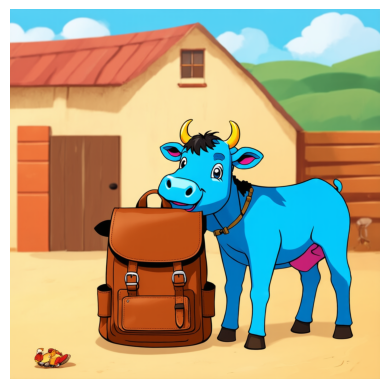

In [ ]:
image = pipe(
    prompt="a brown backpack and a blue cow",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    generator=g,
).images[0]

plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

 29%|██▊       | 8/28 [00:00<00:01, 13.87it/s]

100%|██████████| 28/28 [00:02<00:00, 13.37it/s]


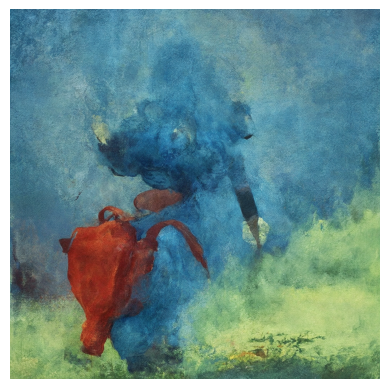

In [39]:
image = pipe(
    prompt="a brown backpack and a blue cow",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=0.0,
    generator=g,
).images[0]

plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

 29%|██▊       | 8/28 [00:00<00:01, 13.84it/s]

100%|██████████| 28/28 [00:02<00:00, 13.38it/s]


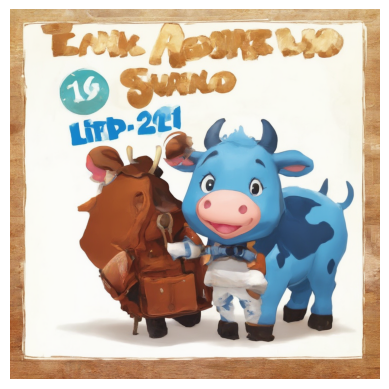

In [37]:
image = pipe(
    prompt="a brown backpack and a blue cow",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=1.0,
    generator=g,
).images[0]

plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:04<00:00,  6.91it/s]


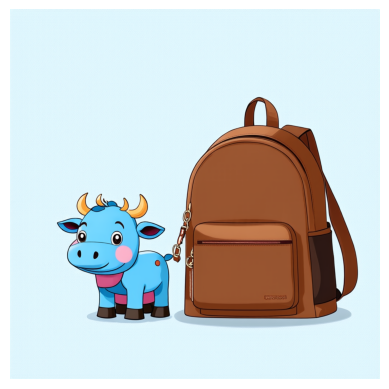

In [25]:
image = pipe_encoder_drop(
    prompt="a brown backpack and a blue cow",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    generator=g,
).images[0]
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

  4%|▎         | 1/28 [00:00<00:03,  6.76it/s]

100%|██████████| 28/28 [00:04<00:00,  6.74it/s]


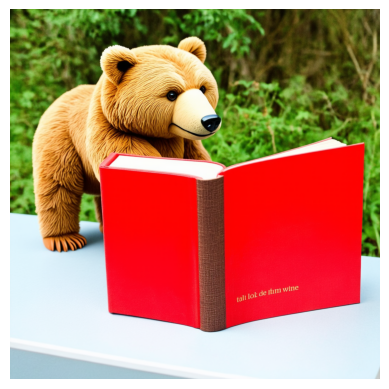

In [40]:
image = pipe(
    prompt="a brown bear and a red book",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]


# Assuming `image` is your generated image
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

 14%|█▍        | 4/28 [00:00<00:02,  8.01it/s]

100%|██████████| 28/28 [00:04<00:00,  6.73it/s]


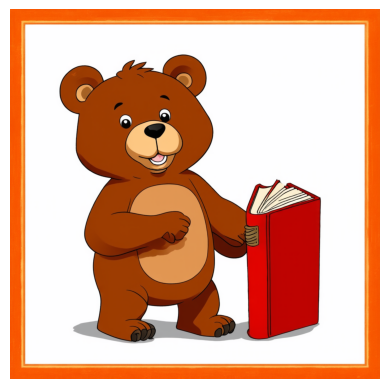

In [42]:
image = pipe(
    prompt="a brown bear and a red book",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:04<00:00,  6.71it/s]


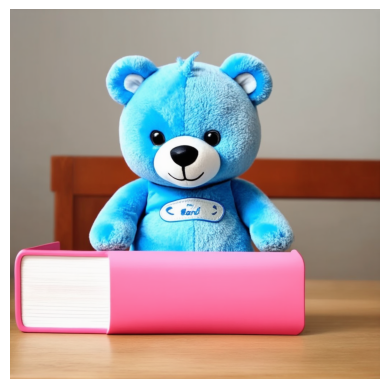

In [43]:
image = pipe(
    prompt="a blue bear and a pink book",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

 25%|██▌       | 7/28 [00:00<00:03,  6.98it/s]

100%|██████████| 28/28 [00:04<00:00,  6.72it/s]


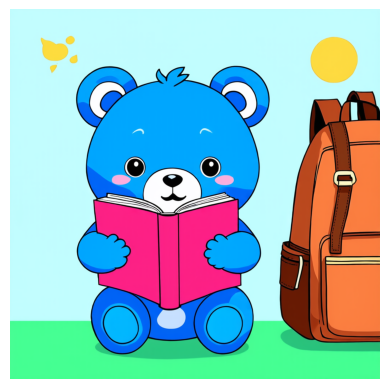

In [ ]:
image = pipe(
    prompt="a blue bear reading a pink book and a backpack in the top right corner",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:04<00:00,  6.74it/s]


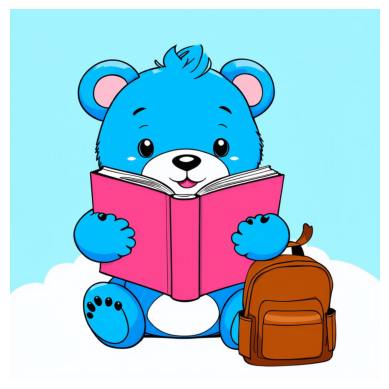

In [49]:
image = pipe(
    prompt="a blue bear reading a pink book and a backpack in the bottom right corner",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:04<00:00,  6.72it/s]


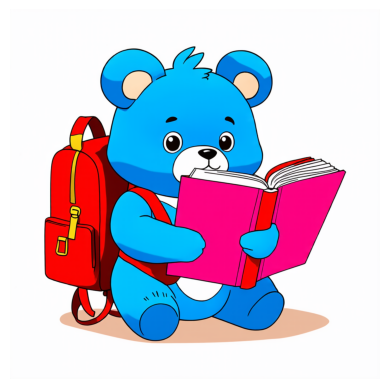

In [47]:
image = pipe(
    prompt="a blue bear reading a pink book and a red backpack in the top left corner",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:04<00:00,  6.70it/s]


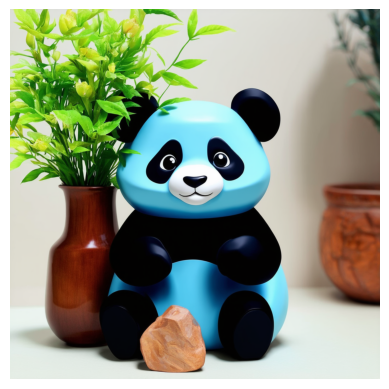

In [ ]:
image = pipe(
    prompt="a uniformly colored blue panda and a brown vase",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:09<00:00,  2.95it/s]


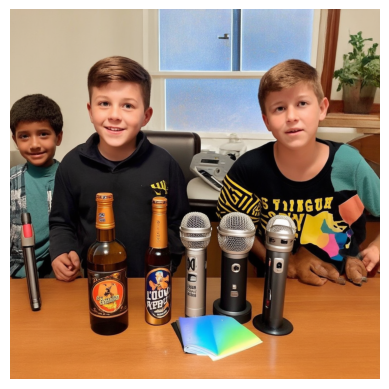

In [3]:
image = pipe(
    prompt="two bottles, four microphones and two boys",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

100%|██████████| 28/28 [00:09<00:00,  3.03it/s]


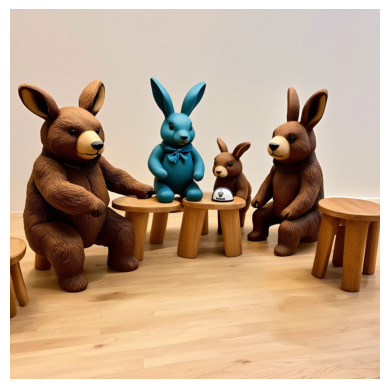

In [4]:


image = pipe(
    prompt="four bears, two rabbits, two helmets, and four stools provided seating",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()

In [ ]:



image = pipe(
    prompt="a balloon hidden by a book",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Assuming `image` is your generated image
# image.save("sd3_hello_world.png")
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner display
plt.show()